# Cleaning Data from New Bedford and Fairhaven Deployments
This repository takes in all of the datafiles from the New Bedford and Fairhaven deployments, aggregates, and cleans the data.

In [8]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sensor_cleaning as sc
from IPython.display import display

%matplotlib inline
pd.set_option('display.max_columns',None)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 32

In [9]:
#Raw Data files
ctd = 'data/ctd/ctd_data.txt'

gga = 'data/gga/gga_329_data.txt'

opa = 'data/op/optode_20180329181123.txt'
opb = 'data/op/optode_20180329192656.txt'
opc = 'data/op/optode_20180329204400.txt'
opd = 'data/op/optode_20180329211740.txt'
ope = 'data/op/optode_20180329213909.txt'
opf = 'data/op/optode_20180329223353.txt'
opg = 'data/op/optode_20180329230511.txt'

nit = 'data/nitrate/A0066336.csv'
nita = 'data/nitrate/suna_20180329181159.txt'
nitb = 'data/nitrate/suna_20180329181205.txt'
nitc = 'data/nitrate/suna_20180329191218,txt'
nitd = 'data/nitrate/suna_20180329204441.txt'

aira = 'data/airmar/airmar_20180329181245.txt'
airb = 'data/airmar/airmar_20180329191141.txt'
airc = 'data/airmar/airmar_20180329204336.txt'
aird = 'data/airmar/airmar_20180329213838.txt'
aire = 'data/airmar/airmar_20180329221731.txt'
airf = 'data/airmar/airmar_20180329230448.txt'

#TODO get the pixhawk files

## Cleaning the Data

,Time,Conductivity,Temperature,Pressure,Sea pressure,Depth,Salinity,Speed of sound,Specific conductivity,Density anomaly,Year,Month,Day,Hour,Minute,Second,Julian_Date,Seconds_Elapsed
9504,2018-03-29 13:19:12.000,28.058638,5.507255,10.996522,0.864022,0.856976,28.378760,1464.405808,44701.527344,22.382645,2018,3,29,13.0,19.0,12.0,2.458207e+06,2553552.0
9505,2018-03-29 13:19:12.500,28.064775,5.501920,10.993600,0.861100,0.854077,28.390107,1464.398287,44718.563858,22.392158,2018,3,29,13.0,19.0,12.5,2.458207e+06,2553552.5


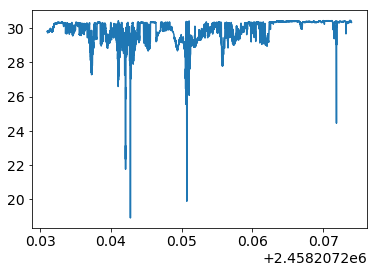

In [26]:
# CTD
ctd_df = pd.read_table(ctd, delimiter=',', header=0)
ctd_df = sc.clean_ctd(ctd_df)

# let's only grab relevant information
ctd_df = ctd_df.drop(ctd_df[ctd_df.Julian_Date < (0.055+2458207)].index)
ctd_df = ctd_df.drop(ctd_df[ctd_df.Julian_Date > (0.274+2458207)].index)

# further, there are two sites of interest; let's grab those seperately as well
ctd_fh = ctd_df.drop(ctd_df[ctd_df.Julian_Date > (0.205+2458207)].index)
ctd_nb = ctd_df.drop(ctd_df[ctd_df.Julian_Date < (0.231+2458207)].index)

plt.plot(ctd_nb['Julian_Date'], ctd_nb['Salinity'])
ctd_df.head(2)

,Time,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed,Julian_Date,CH4_ppm,CO2_ppm,CH4_ppm_adjusted,CO2_ppm_adjusted
4166,03/29/2018 14:19:12.941,2018,3,29,13.0,19.0,12.941,2553552.941,2.458207e+06,2.2926,410.650,1.147641,120.087103
4167,03/29/2018 14:19:13.917,2018,3,29,13.0,19.0,13.917,2553553.917,2.458207e+06,2.2953,410.278,1.151853,119.978318


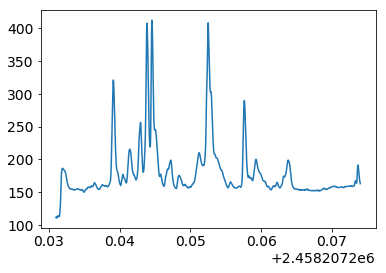

In [46]:
# GGA
reload(sc)
gga_df = pd.read_table(gga, delimiter=', ', header=1, engine='python')
gga_df = sc.clean_gga(gga_df)

# Only keep the columns with useful information
gga_df = gga_df.loc[:,['Time',
                 'Year',
                 'Month',
                 'Day',
                 'Hour',
                 'Minute',
                 'Second',
                 'Seconds_Elapsed',
                 'Julian_Date',
                 'CH4_ppm',
                 'CO2_ppm',
                 'CH4_ppm_adjusted',
                 'CO2_ppm_adjusted']]

# Get rid of junk
gga_df = gga_df.drop(gga_df[gga_df.Julian_Date < (0.055+2458207)].index)
gga_df = gga_df.drop(gga_df[gga_df.Julian_Date > (0.274+2458207)].index)

# further, there are two sites of interest; let's grab those seperately as well
gga_fh = gga_df.drop(gga_df[gga_df.Julian_Date > (0.205+2458207)].index)
gga_nb = gga_df.drop(gga_df[gga_df.Julian_Date < (0.231+2458207)].index)

plt.plot(gga_nb['Julian_Date'], gga_nb['CO2_ppm_adjusted'])
# plt.plot(ctd_df['Julian_Date'], ctd_df['Salinity']*10)

gga_df.head(2)

,posixtime,model,SN,O2Concentration,AirSaturation,Temperature,CalPhase,TCPhase,C1RPh,C2RPh,C1Amp,C2Amp,RawTemp,Julian_Date
437,1.522333e+09,4831.0,277,425.7390,108.2564,5.551868,33.04836,3.304836E+01,4.139844E+01,8.350082E+00,888.7757,1055.159,668.6605,2.458207e+06
438,1.522333e+09,4831.0,277,426.0607,108.3061,5.540327,33.04543,3.304543E+01,4.139336E+01,8.347931E+00,888.3184,1054.925,669.0101,2.458207e+06


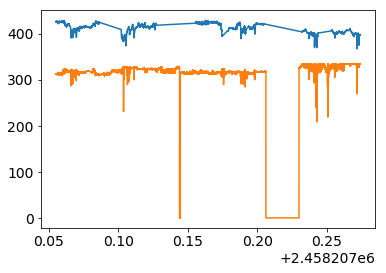

In [60]:
# optode
reload(sc)
op_df = pd.read_table(opa, delimiter=',', header=0, engine='c')
tempb = pd.read_table(opb, delimiter=',', header=0, engine='c')
tempc = pd.read_table(opc, delimiter=',', header=0, engine='c')
tempd = pd.read_table(opd, delimiter=',', header=0, engine='c')
tempe = pd.read_table(ope, delimiter=',', header=0, engine='c')
tempf = pd.read_table(opf, delimiter=',', header=0, engine='c')
tempg = pd.read_table(opg, delimiter=',', header=0, engine='c')

op_df = op_df.append(tempb, ignore_index=True)
op_df = op_df.append(tempc, ignore_index=True)
op_df = op_df.append(tempd, ignore_index=True)
op_df = op_df.append(tempe, ignore_index=True)
op_df = op_df.append(tempf, ignore_index=True)
op_df = op_df.append(tempg, ignore_index=True)

op_df = sc.clean_optode(op_df)
op_df = op_df.dropna()

# limit the times
op_df = op_df.drop(op_df[op_df.Julian_Date < (0.055+2458207)].index)
op_df = op_df.drop(op_df[op_df.Julian_Date > (0.274+2458207)].index)

# get the two sites
op_fh = op_df.drop(op_df[op_df.Julian_Date > (0.205+2458207)].index)
op_nb = op_df.drop(op_df[op_df.Julian_Date < (0.231+2458207)].index)

plt.plot(op_df['Julian_Date'], op_df['O2Concentration'])
plt.plot(ctd_df['Julian_Date'], ctd_df['Salinity']*11)
op_df.head(2)

,lat,lon,lat_mod,lon_mod,Julian_Date,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed,COG_T,SOG_K,pressure_B,wind_dir_T,wind_speed_M,rateofturn
387,4138.3258,7054.4446,41.638763,-70.907410,2.458207e+06,2018,3,29,13.0,19.0,12.9,2553552.9,264.5,1.1,1.0182,173.0,2.1,0
388,4138.3258,7054.4447,41.638763,-70.907412,2.458207e+06,2018,3,29,13.0,19.0,13.9,2553553.9,260.5,1.1,1.0184,175.4,1.9,0
389,4138.3258,7054.4448,41.638763,-70.907413,2.458207e+06,2018,3,29,13.0,19.0,14.9,2553554.9,260.2,0.9,1.0184,173.6,1.6,0
390,4138.3259,7054.4449,41.638765,-70.907415,2.458207e+06,2018,3,29,13.0,19.0,15.9,2553555.9,256.9,0.9,1.0185,172.4,1.9,0
391,4138.3259,7054.4450,41.638765,-70.907417,2.458207e+06,2018,3,29,13.0,19.0,16.9,2553556.9,255.9,0.7,1.0184,168.8,1.7,0


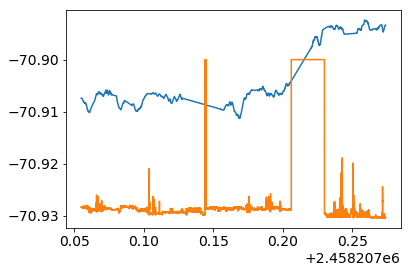

In [104]:
#airmar
reload(sc)
air_df = pd.read_table(aira, delimiter=',', header=0, engine='python')
tempb = pd.read_table(airb, delimiter=',', header=0, engine='python')
tempc = pd.read_table(airc, delimiter=',', header=0, engine='python')
tempd = pd.read_table(aird, delimiter=',', header=0, engine='python')
tempe = pd.read_table(aire, delimiter=',', header=0, engine='python')
tempf = pd.read_table(airf, delimiter=',', header=0, engine='python')

air_df = air_df.append(tempb, ignore_index=True)
air_df = air_df.append(tempc, ignore_index=True)
air_df = air_df.append(tempd, ignore_index=True)
air_df = air_df.append(tempe, ignore_index=True)
air_df = air_df.append(tempf, ignore_index=True)

# air_df.head(2)

air_df = sc.clean_airmar(air_df)
air_df = air_df.loc[:,['lat',
                       'lon',
                       'lat_mod',
                       'lon_mod',
                       'Julian_Date',
                       'Year',
                       'Month',
                       'Day',
                       'Hour',
                       'Minute',
                       'Second',
                       'Seconds_Elapsed',
                       'COG_T',
                       'SOG_K',
                       'pressure_B',
                       'wind_dir_T',
                       'wind_speed_M',
                       'rateofturn']]
# air_df = air_df.dropna()

# limit the times
air_df = air_df.drop(air_df[air_df.Julian_Date < (0.055+2458207)].index)
air_df = air_df.drop(air_df[air_df.Julian_Date > (0.274+2458207)].index)

# get the two sites
air_fh = air_df.drop(air_df[air_df.Julian_Date > (0.205+2458207)].index)
air_nb = air_df.drop(air_df[air_df.Julian_Date < (0.231+2458207)].index)

plt.plot(air_df['Julian_Date'], air_df['lon_mod'])
# op_df.head(2)
air_df.head(5)

,Julian_Date,0.00,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed
535,2.458207e+06,19.25,2018,3,29,13,19,13.4472,2.553553e+06
536,2.458207e+06,19.78,2018,3,29,13,19,15.7440,2.553556e+06


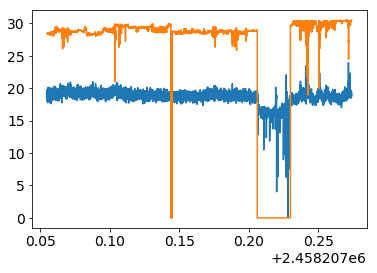

In [119]:
#nitrate
reload(sc)
nit_df = pd.read_table(nit, delimiter=',', header=14, engine='python')
nit_df = sc.clean_nitrate(nit_df)

#keep only certain columns
nit_df = nit_df.loc[:,['Julian_Date',
                         '0.00',
                         'Year',
                         'Month',
                         'Day',
                         'Hour',
                         'Minute',
                         'Second',
                         'Seconds_Elapsed']]

# limit the times
nit_df = nit_df.drop(nit_df[nit_df.Julian_Date < (0.055+2458207)].index)
nit_df = nit_df.drop(nit_df[nit_df.Julian_Date > (0.274+2458207)].index)

# get the two sites
nit_fh = nit_df.drop(nit_df[nit_df.Julian_Date > (0.205+2458207)].index)
nit_nb = nit_df.drop(nit_df[nit_df.Julian_Date < (0.231+2458207)].index)

plt.plot(nit_df['Julian_Date'], nit_df['0.00'])
plt.plot(ctd_df['Julian_Date'], ctd_df['Salinity'])

nit_df.head(2)